# Лаба 1

# Решение краевых задач методом разностных аппроксимаций

## Задание 

Составить разностную схему и получить численное решение краевой задачи с точностью $10^{-3}$

### Краевые условия 

$y(-1)=0$

$y(1) = 0$

In [1]:
import matplotlib.pyplot as plot
import numpy as np
from math import sin, cos, tan

## Задание 1

### Условие

$y''+(1+x^2)y=-1, -1 \leq x \leq 1$

### Решение

 $y''-p(x)y=f(x)$ -  частный случай линейной краевой задачи
 
 $p(x)=-(1+x^2)$,
 
 $f(x)=-1$   

In [15]:
a = -1; b = 1; A = 0; B = 0

def f(x):
    return -1

def p(x):
    return -(1 + x**2)

def get_step(n):
    return (b - a) / n

def get_x(n, h):
    return [a + k * h for k in range(n + 1)]

In [3]:
def line_system(n, h, x):
    matr = [
        [0 for i in range(n + 1)] for j in range(n + 1)
    ]
    matr[0][0] = matr[n][n] = 1
    for i in range(1, n):
        matr[i][i + 1] = 1
        matr[i][i - 1] = 1
        matr[i][i] = -(2 + h**2 * p(x[i]))
    matr = np.array(matr)
    vector = [0 for _ in range(n + 1)]
    for i in range(1, n):
        vector[i] = h**2 * f(x[i])
    vector = np.array(vector)
    return matr, vector

def solve_system(n):
    h = get_step(n)
    x = get_x(n, h)
    matrix, vector = line_system(n, h, x)
    y = list(np.linalg.solve(matrix, vector))
    return x, y

Выбираем $n$

In [4]:
n = 2
n

2

Далее c точностью $10^{-3}$ находим решение краевой задачи

In [5]:
saved_x = []
saved_y = []
x0, y0 = solve_system(n)
x1, y1 = solve_system(2*n)
while True:
    check_values = []
    for i in range(0, n):
        check_values.append(abs(y1[2*i] - y0[i]) < 0.001)
    n *= 2
    if all(check_values):
        break
    else:
        saved_x.append(x0)
        saved_y.append(y0)
        x0, y0 = x1, y1
        x1, y1 = solve_system(2*n)

In [6]:
f"Заданная точность достигается на {n} отрезках"

'Заданная точность достигается на 64 отрезках'

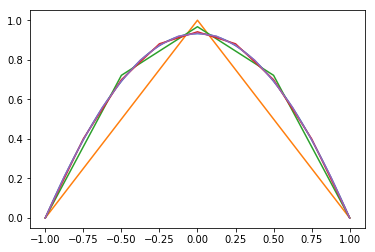

In [7]:
plot.plot(np.linspace(a, b, n + 1), y1)
for i, j in zip(saved_x, saved_y):
    plot.plot(np.linspace(a, b, len(i)), j)
plot.show()

In [8]:
f"Ордината при которой достигается заданная точность {max(y1)}"

'Ордината при которой достигается заданная точность 0.9322042384592321'

## Задание 2

### Условие

$ay''+(1+bx^2)y=-1, -1 \leq x \leq 1$

### Решение

Преобразуем исходное уравненение разделив все на $sin(k)$:

$ y''+(\dfrac{1}{sin(2)}+\dfrac{1}{tg(2)}x^2)y=\dfrac{-1}{sin(2)}, -1 \leq x \leq 1$

In [9]:
def p(x):
    return -(1 / sin(2) + 1 / tan(2) * x**2)

def f(x):
    return -1 / sin(2)

Выбираем $n$

In [10]:
n = 2
n

2

Получаем точно такое же решение

In [11]:
saved_x = []
saved_y = []
x0, y0 = solve_system(n)
x1, y1 = solve_system(2*n)
while True:
    check_values = []
    for i in range(0, n):
        check_values.append(abs(y1[2*i] - y0[i]) < 0.001)
    n *= 2
    if all(check_values):
        break
    else:
        saved_x.append(x0)
        saved_y.append(y0)
        x0, y0 = x1, y1
        x1, y1 = solve_system(2*n)

In [12]:
f"Заданная точность достигается на {n} отрезках"

'Заданная точность достигается на 64 отрезках'

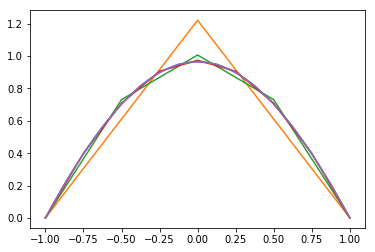

In [13]:
plot.plot(np.linspace(a, b, n + 1), y1)
for i, j in zip(saved_x, saved_y):
    plot.plot(np.linspace(a, b, len(i)), j)
plot.show()

In [14]:
f" В {max(y1)} достигается заданная точность"

' В 0.9646367918445022 достигается заданная точность'